# Top title

The notebook headers will be printed during testing whenever the verbosity level `nbtest(...; verbose=3)` is greater than or equal to the number of `#` of the header. By default, all headers are printed (`verbose=5`)

In [1]:
using NBTesting
using Base.Test

using PyPlot

# This defines 
#     plot(args...; kwargs...) = nothing
# but only during testing.
@testing_noop plot

INFO: Recompiling stale cache file /Users/cedric/.julia/lib/v0.5/NBTesting.ji for module NBTesting.


### Basic Arithmetic

The last test fails, but because it's after `#NBSKIP`, it won't be executed during `nbtest`. `#NBSKIP` is also useful for skipping long computations that we don't want to test.

In [6]:
x = 10 / 2
@test x+x == 10
@test 6*10 == 60
#NBSKIP
@test 7-7 == 3

Test Failed
  Expression: 7 - 7 == 3
   Evaluated: 0 == 3


LoadError: There was an error during testing

During normal notebook execution, `is_testing == false`, but it will be `true` during testing. Using this variable, we might test our code using parameters that make it run faster.

In [8]:
N = is_testing ? 5 : 100

srand(1)
M1 = ones(N, N)
M2 = rand(N, N);

if is_testing
    @test 30 < sum(M1 * M2) < 100
end

sum(M1 * M2)

503203.4224128609

#### Some plot

We could put a `#NBSKIP` before every plotting call, but the `@testing_noop` macro (see above) is more convenient.

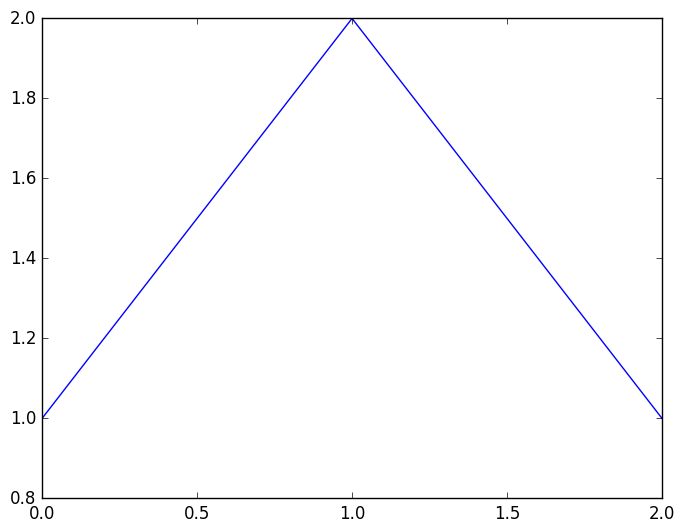

In [7]:
plot([1,2,1]);